# Grayscale

> Grayscale Image Colorization with GANs

Setup the environment by running the following to setup the dependencies and download the dataset.

In [ ]:
! if [ ! -d dataset ] ; \
  then wget https://github.com/anthonytedja/grayscale-dataset/raw/main/dataset.zip; \
    unzip dataset.zip; \
    rm dataset.zip; \
fi

In [ ]:
%pip install -r requirements.txt

## Dataset

The dataset consists of grayscale images and corresponding colored images. Run the following to display the first three image pairs from the dataset.

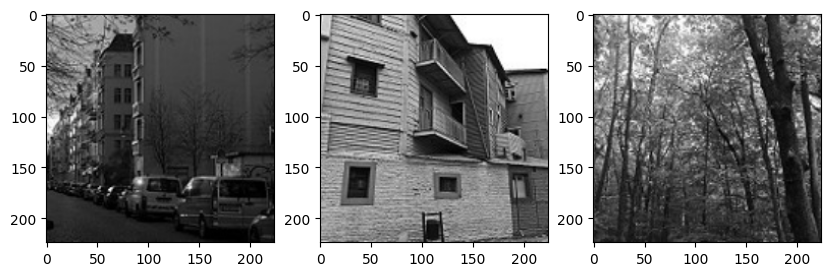

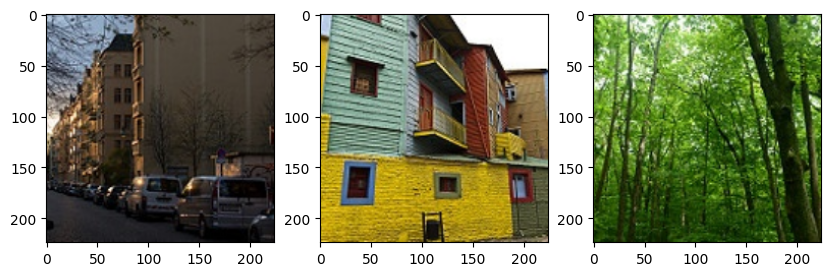

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

import src.config as config

gray_filenames = os.listdir(config.DIR_GRAY_IMAGES)
gray_filenames.sort(key=lambda x: int(x.split('.')[0]))
color_filenames = os.listdir(config.DIR_COLOR_IMAGES)
color_filenames.sort(key=lambda x: int(x.split('.')[0]))

plt.figure(figsize=(10, 10))
for i in range(3):
    gray_filename = gray_filenames[i]
    gray_image = cv2.imread(os.path.join(config.DIR_GRAY_IMAGES, gray_filename))
    gray_image = cv2.resize(gray_image, (config.IMAGE_SIZE, config.IMAGE_SIZE))
    gray_image = cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, i+1)
    plt.imshow(gray_image)

plt.show()

plt.figure(figsize=(10, 10))
for i in range(3):
    color_filename = color_filenames[i]
    color_image = cv2.imread(os.path.join(config.DIR_COLOR_IMAGES, color_filename))
    color_image = cv2.resize(color_image, (config.IMAGE_SIZE, config.IMAGE_SIZE))
    color_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 3, i+1)
    plt.imshow(color_image)

plt.show()

## Training

Run the following to train the model and save the model weights. Models are saved to the `models` directory.

In [ ]:
!python3 src/main.py

## Testing

Run the following to test the model and display the results. The images are saved to the `images` directory.

In [ ]:
!python3 src/main.py --mode train